In [ ]:
import time

start_time = time.perf_counter()

# Imports

In [ ]:
! python --version

Python 3.7.12


In [ ]:
# !pip install tensorflow_hub
# !pip install keras tf-models-official pydot graphviz

In [ ]:
!pip install contractions

     |████████████████████████████████| 284 kB 2.6 MB/s 
     |████████████████████████████████| 321 kB 19.3 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85450 sha256=08260fb743a3b5594480d99131b29b58591228e41d2ffbe3ffe8e842c2457a7e
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
!pip install transformers
from transformers import BertTokenizer

     |████████████████████████████████| 2.9 MB 4.2 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 3.3 MB 39.5 MB/s 
     |████████████████████████████████| 895 kB 46.7 MB/s 


In [ ]:
import os


import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub

from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt


gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

1 Physical GPUs, 1 Logical GPUs
Version:  2.6.0
Eager mode:  True
Hub version:  0.12.0
GPU is available


In [ ]:
np.random.seed(3)
from tensorflow.python.framework.random_seed import set_random_seed
set_random_seed(3)

In [ ]:
train_data = pd.read_csv("/content/train.csv")
train_data['dataset'] = "train"
test_data = pd.read_csv("/content/test.csv")
test_data['dataset'] = "test"

In [ ]:
data_df = pd.concat([train_data, test_data])
data_df.shape

(13083, 3)

In [ ]:
train_df = data_df[data_df.dataset=="train"].copy()
test_df = data_df[data_df.dataset=="test"].copy()

x_train = train_df.text.values
y_train = train_df.category.values

x_test = test_df.text.values
y_test = test_df.category.values

In [ ]:
encoder = LabelEncoder()
encoder.fit(data_df.category)
encoded_Y_test = encoder.transform(y_test)
encoded_Y_train = encoder.transform(y_train)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y_test)
dummy_y_train = np_utils.to_categorical(encoded_Y_train)

In [ ]:
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=True)

INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1'.
INFO:absl:Downloaded https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1, Total size: 423.26MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1'.


In [ ]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

DEBUG:filelock:Attempting to acquire lock 139644800835152 on /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99.lock
DEBUG:filelock:Lock 139644800835152 acquired on /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99.lock


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

DEBUG:filelock:Attempting to release lock 139644800835152 on /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99.lock
DEBUG:filelock:Lock 139644800835152 released on /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99.lock
DEBUG:filelock:Attempting to acquire lock 139644797790480 on /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79.lock
DEBUG:filelock:Lock 139644797790480 acquired on /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79.lock


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

DEBUG:filelock:Attempting to release lock 139644797790480 on /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79.lock
DEBUG:filelock:Lock 139644797790480 released on /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79.lock
DEBUG:filelock:Attempting to acquire lock 139644797790864 on /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4.lock
DEBUG:filelock:Lock 139644797790864 acquired on /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4.lock


Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

DEBUG:filelock:Attempting to release lock 139644797790864 on /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4.lock
DEBUG:filelock:Lock 139644797790864 released on /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4.lock
DEBUG:filelock:Attempting to acquire lock 139642748012304 on /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e.lock
DEBUG:filelock:Lock 139642748012304 acquired on /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e.lock


Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

DEBUG:filelock:Attempting to release lock 139642748012304 on /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e.lock
DEBUG:filelock:Lock 139642748012304 released on /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e.lock


In [ ]:
def encode_names(n):
   tokens = list(tokenizer.tokenize(n))
   tokens.append('[SEP]')  # seperation token. Would bemuch more useful if you had a multiple text input.
   return tokenizer.convert_tokens_to_ids(tokens)

text_inp = tf.ragged.constant([
    encode_names(n) for n in x_train])

In [ ]:
cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])]*text_inp.shape[0]
input_word_ids = tf.concat([cls, text_inp], axis=-1)

## Mask and input type

The model expects two additional inputs:

* The input mask
* The input type

The mask allows the model to cleanly differentiate between the content and the padding. The mask has the same shape as the `input_word_ids`, and contains a `1` anywhere the `input_word_ids` is not padding.

In [ ]:
lens = [len(i) for i in input_word_ids]

In [ ]:
max_seq_length = max(lens)
print('Max length is:', max_seq_length)

Max length is: 98


Most of the time I suggest adding a bit more to the `max_seq_length` esspecially when ussing just a fraction of data. Let's make it `1.5*max_seq_length`.

In [ ]:
max_seq_length = int(1.5*max_seq_length)
print('Max length is:', max_seq_length)

Max length is: 147


In [ ]:
def encode_names(n, tokenizer):
   tokens = list(tokenizer.tokenize(n))
   tokens.append('[SEP]')
   return tokenizer.convert_tokens_to_ids(tokens)

def bert_encode(string_list, tokenizer, max_seq_length):
  num_examples = len(string_list)
  
  string_tokens = tf.ragged.constant([
      encode_names(n, tokenizer) for n in np.array(string_list)])

  cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])]*string_tokens.shape[0]
  input_word_ids = tf.concat([cls, string_tokens], axis=-1)

  input_mask = tf.ones_like(input_word_ids).to_tensor(shape=(None, max_seq_length))

  type_cls = tf.zeros_like(cls)
  type_tokens = tf.ones_like(string_tokens)
  input_type_ids = tf.concat(
      [type_cls, type_tokens], axis=-1).to_tensor(shape=(None, max_seq_length))

  inputs = {
      'input_word_ids': input_word_ids.to_tensor(shape=(None, max_seq_length)),
      'input_mask': input_mask,
      'input_type_ids': input_type_ids}

  return inputs

In [ ]:
X_train = bert_encode(x_train, tokenizer, max_seq_length)
X_test = bert_encode(x_test, tokenizer, max_seq_length)

In [ ]:
num_class = len(encoder.classes_)  # Based on available class selection
max_seq_length = max_seq_length  # we calculated this a couple cells ago

input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="segment_ids")

pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])                                  

output = tf.keras.layers.Dropout(rate=0.1)(pooled_output)

output = tf.keras.layers.Dense(num_class, activation='softmax', name='output')(output)

model = tf.keras.Model(
    inputs={
        'input_word_ids': input_word_ids,
        'input_mask': input_mask,
        'input_type_ids': segment_ids
        },
        outputs=output)

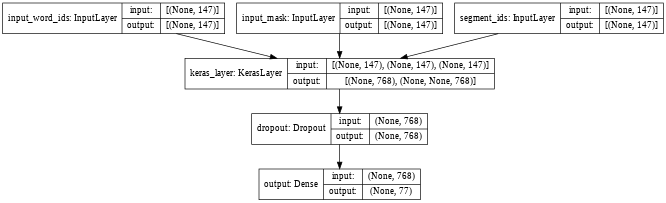

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=48)

In [ ]:
epochs = 3
batch_size = 16  # select based on your GPU resources
eval_batch_size = batch_size

train_data_size = len(dummy_y_train)
steps_per_epoch = int(train_data_size / batch_size)
num_train_steps = steps_per_epoch * epochs
warmup_steps = int(epochs * train_data_size * 0.1 / batch_size)


In [ ]:
from tensorflow import keras
from keras import optimizers
optimizer = keras.optimizers.Adam(learning_rate=2e-5)

In [ ]:
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 147)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 147)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 147)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

In [ ]:
%%time
history = model.fit(X_train,
                    dummy_y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, dummy_y_test),
                    verbose=1)

Epoch 1/3
626/626 [==============================] - 646s 1s/step - loss: 1.9692 - accuracy: 0.5834 - val_loss: 0.6221 - val_accuracy: 0.8779
Epoch 2/3
626/626 [==============================] - 625s 998ms/step - loss: 0.3588 - accuracy: 0.9262 - val_loss: 0.3649 - val_accuracy: 0.9208
Epoch 3/3
626/626 [==============================] - 624s 997ms/step - loss: 0.1405 - accuracy: 0.9712 - val_loss: 0.3217 - val_accuracy: 0.9224
CPU times: user 20min 5s, sys: 1min 46s, total: 21min 52s
Wall time: 31min 35s


In [ ]:
loss, accuracy = model.evaluate(X_train, dummy_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, dummy_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9900
Testing Accuracy:  0.9224


In [ ]:
print(time.perf_counter() - start_time, "second")
print((time.perf_counter() - start_time)/60, "minutes")

2411.383982108 second
40.18973695366667 minutes


In [ ]:
y_out = model.predict(X_test)

In [ ]:
from collections import Counter
Counter([encoder.classes_[np.argmax(y)] for y in y_out])

Counter({'Refund_not_showing_up': 38,
         'activate_my_card': 40,
         'age_limit': 40,
         'apple_pay_or_google_pay': 41,
         'atm_support': 39,
         'automatic_top_up': 36,
         'balance_not_updated_after_bank_transfer': 44,
         'balance_not_updated_after_cheque_or_cash_deposit': 37,
         'beneficiary_not_allowed': 39,
         'cancel_transfer': 38,
         'card_about_to_expire': 40,
         'card_acceptance': 37,
         'card_arrival': 38,
         'card_delivery_estimate': 40,
         'card_linking': 41,
         'card_not_working': 40,
         'card_payment_fee_charged': 41,
         'card_payment_not_recognised': 38,
         'card_payment_wrong_exchange_rate': 42,
         'card_swallowed': 37,
         'cash_withdrawal_charge': 40,
         'cash_withdrawal_not_recognised': 48,
         'change_pin': 44,
         'compromised_card': 33,
         'contactless_not_working': 35,
         'country_support': 43,
         'declined_card_pay

In [ ]:
final_pred = pd.DataFrame({'pred':[encoder.classes_[np.argmax(y)] for y in y_out],'actual':y_test})

In [ ]:
final_pred['flag'] = np.where(final_pred['pred']== final_pred['actual'],1,0)

In [ ]:
final_pred[final_pred['flag']==0]['actual'].value_counts()

pending_transfer                       16
topping_up_by_card                     10
transfer_into_account                   9
compromised_card                        9
direct_debit_payment_not_recognised     9
                                       ..
declined_cash_withdrawal                1
cash_withdrawal_not_recognised          1
card_about_to_expire                    1
top_up_limits                           1
receiving_money                         1
Name: actual, Length: 66, dtype: int64

In [ ]:
final_pred[final_pred['actual']=='why_verify_identity']['flag'].value_counts()

1    32
0     8
Name: flag, dtype: int64

In [ ]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

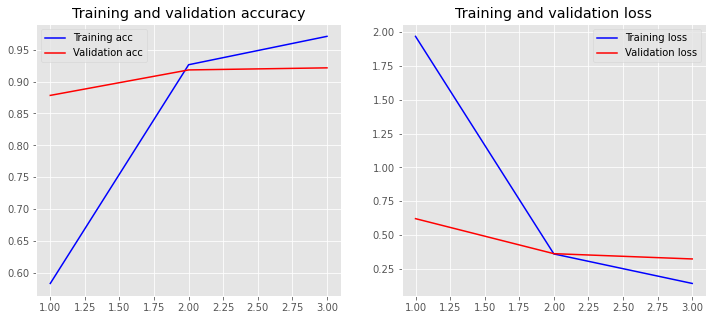

In [ ]:
plot_history(history)

In [ ]:
my_wd = '/content/results_banking/'
if not os.path.isdir(my_wd):
  os.makedirs(my_wd)

In [ ]:
## saving results
%%time
encoder_fname = 'encoder_file.npy'
np.save(os.path.join(my_wd, encoder_fname) , encoder.classes_)

CPU times: user 169 µs, sys: 970 µs, total: 1.14 ms
Wall time: 1.31 ms


In [ ]:
%%time
model_fname = 'model_banking_trial'
model.save(os.path.join(my_wd, model_fname))


INFO:tensorflow:Assets written to: /content/results_banking/model_banking_trial/assets


INFO:tensorflow:Assets written to: /content/results_banking/model_banking_trial/assets


CPU times: user 15.7 s, sys: 2.9 s, total: 18.6 s
Wall time: 21.1 s


In [ ]:
result_start_time = time.perf_counter()

In [ ]:
%%time
def bert_encode(string_list, tokenizer, max_seq_length):
  num_examples = len(string_list)
  
  string_tokens = tf.ragged.constant([
      encode_names(n, tokenizer) for n in np.array(string_list)])

  cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])]*string_tokens.shape[0]
  input_word_ids = tf.concat([cls, string_tokens], axis=-1)

  input_mask = tf.ones_like(input_word_ids).to_tensor(shape=(None, max_seq_length))

  type_cls = tf.zeros_like(cls)
  type_tokens = tf.ones_like(string_tokens)
  input_type_ids = tf.concat(
      [type_cls, type_tokens], axis=-1).to_tensor(shape=(None, max_seq_length))

  inputs = {
      'input_word_ids': input_word_ids.to_tensor(shape=(None, max_seq_length)),
      'input_mask': input_mask,
      'input_type_ids': input_type_ids}

  return inputs

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs


In [ ]:
%%time
encoder_fname = 'encoder_file.npy'
my_wd = '/content/results_banking/'
encoder.classes_ = np.load(os.path.join(my_wd, encoder_fname), allow_pickle=True)

CPU times: user 842 µs, sys: 0 ns, total: 842 µs
Wall time: 709 µs


In [ ]:
%%time
model_fname = 'model_banking_trial'
my_wd = '/content/results_banking/'
new_model = tf.keras.models.load_model(os.path.join(my_wd, model_fname))

CPU times: user 18 s, sys: 2.58 s, total: 20.6 s
Wall time: 19.2 s


In [ ]:
# tokenizedTweet = tokenizerSaved.tokenize(x_train[0])
# for i in tokenizedTweet:
#   print(i, tokenizerSaved.convert_tokens_to_ids([i]))

In [ ]:
%%time
tokenizerSaved = bert.tokenization.FullTokenizer(
    vocab_file=os.path.join(my_wd, model_fname, 'assets/vocab.txt'),
    do_lower_case=False)

CPU times: user 101 ms, sys: 1.57 ms, total: 102 ms
Wall time: 103 ms


In [ ]:
%%time
new_text = x_test[3]
inputs = bert_encode(string_list= list([new_text]), 
                     tokenizer=tokenizerSaved, 
                     max_seq_length=max_seq_length) ## we can save max_seq_lenght in a dict

CPU times: user 21.4 ms, sys: 2.16 ms, total: 23.6 ms
Wall time: 24.5 ms


In [ ]:
%%time
prediction = new_model.predict(inputs)
print(encoder.classes_[np.argmax(prediction)])

card_delivery_estimate
CPU times: user 1.35 s, sys: 6.19 ms, total: 1.36 s
Wall time: 1.35 s


In [ ]:
print(time.perf_counter() - result_start_time, "second")
print((time.perf_counter() - result_start_time)/60, "minutes")

20.82920411699979 second
0.34715721213333384 minutes
